In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


- IDYear_Birth: Likely the customer's year of birth.
- Education: The customer's education level (e.g., Graduation, PhD).
- Marital_Status: The customer's marital status (e.g., Single, Together, Married).
- Income: The customer's income.
- Kidhome: Possibly a binary indicator for the presence of kids at home.
- Teenhome: Possibly a binary indicator for the presence of teenagers at home.
- Dt_Customer: Likely the date when the customer was acquired or became a customer.
- Recency: Possibly the recency of the customer's last purchase or activity.
- MntWines: Potentially the amount spent on wines by the customer.
- NumWebVisits: The number of web visits by the customer.
- AcceptedCmp[1-5]: Binary indicators for whether the customer accepted certain campaigns or promotions.
- Complain: Possibly a binary indicator for whether the customer has complained or not.
- Z_CostContact: Likely a derived or transformed variable related to the cost of contacting the customer.
- Z_Revenue: Possibly a derived or transformed variable related to the customer's revenue.
- Response: Potentially a target variable indicating the customer's response to a particular campaign or promotion.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [5]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [6]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [7]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


Marital_Status:

There are 8 distinct categories in the Marital_Status feature.
The most common marital status is "Married" with 857 instances.
The next most common statuses are "Together" (573) and "Single" (471).
There are also categories like "Divorced" (232), "Widow" (76), "Alone" (3), "Absurd" (2), and "YOLO" (2).
The presence of categories like "Absurd" and "YOLO" suggests potential data quality issues or inconsistencies in how the data was collected or recorded.


Education:

There are 5 distinct categories in the Education feature.
The most common education level is "Graduation" with 1116 instances.
The next most common levels are "PhD" (481) and "Master" (365).
There are also categories like "2n Cycle" (200) and "Basic" (54).
The presence of "2n Cycle" and "Basic" suggests that the dataset may include varying levels of education, potentially ranging from primary/secondary to advanced degrees.


General Observations:

The presence of categories like "Absurd" and "YOLO" in the Marital_Status feature raises concerns about data quality and consistency.
It would be advisable to investigate these anomalous categories further and potentially clean or preprocess the data before conducting any analysis or modeling.
The Education feature appears to have more consistent and expected categories, ranging from basic education to advanced degrees.
However, further exploration and domain knowledge may be required to fully understand the meaning and implications of each education category in the context of the dataset.

## Feature Engineering

In [8]:
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

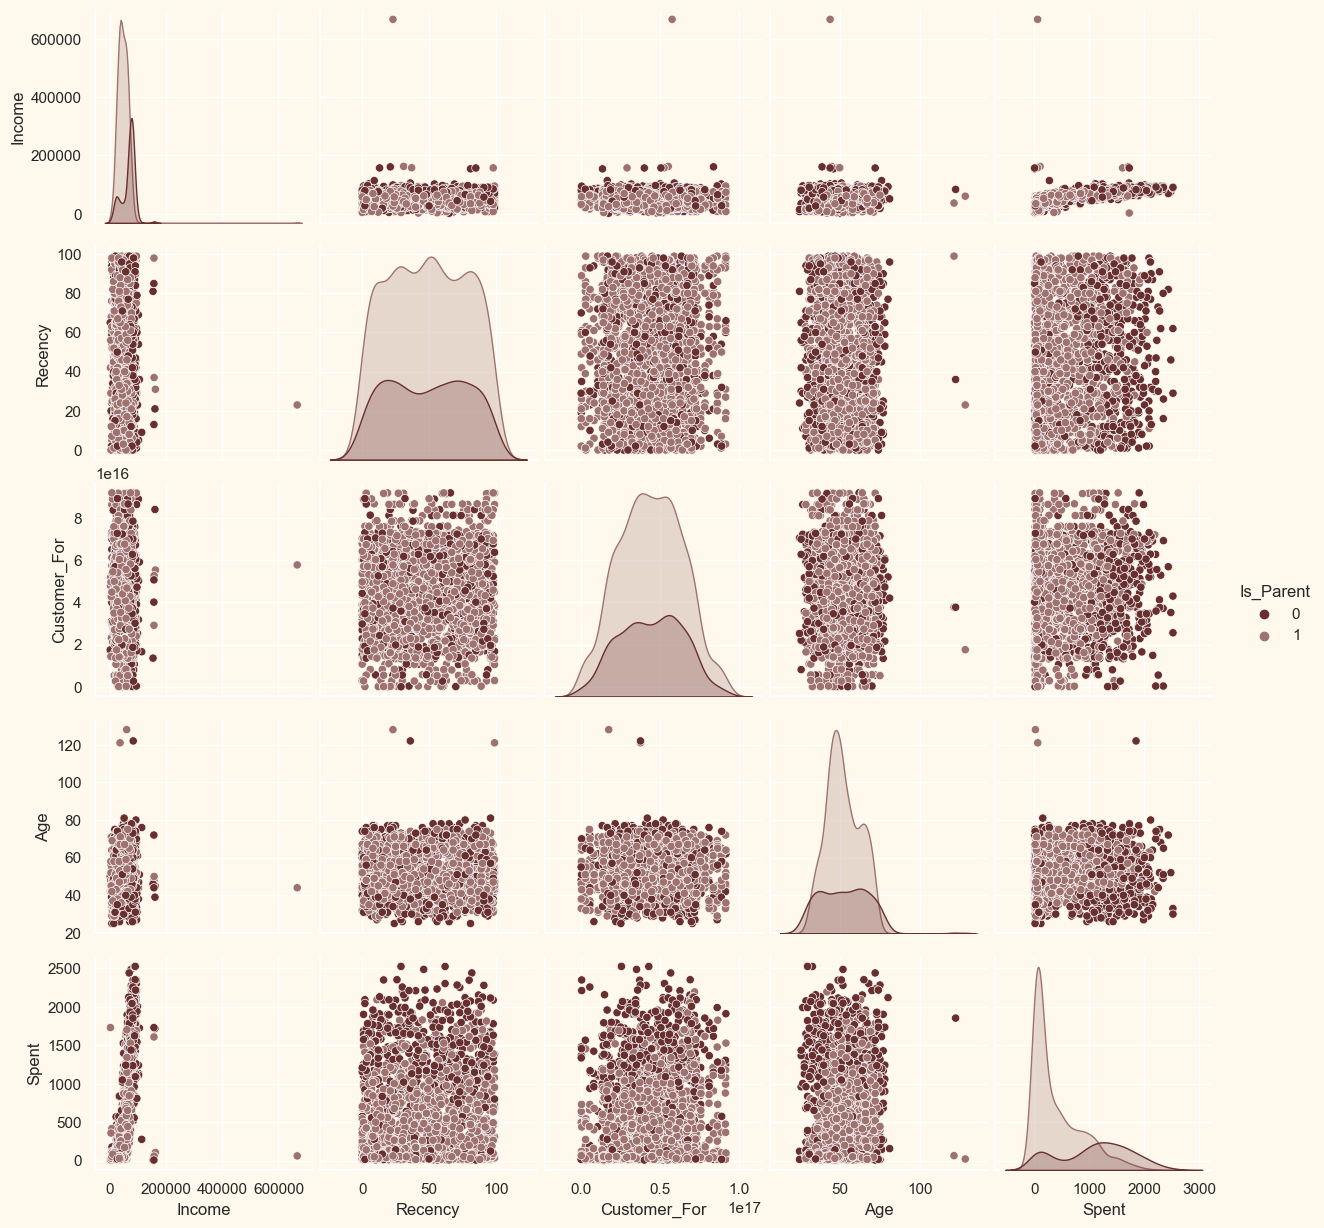

In [9]:
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
palette = {
    "Income": "#682F2F",
    "Recency": "#9E726F",
    "Customer_For": "#D6B2B1",
    "Age": "#B9C0C9",
    "Spent": "#9F8A78",
    "Is_Parent": "#F3AB60"
}
hue_palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
To_Plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Relative Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue="Is_Parent", palette=hue_palette)
plt.show()

- Income Distribution: The income distribution appears to be heavily right-skewed, with a large peak near zero and a long tail extending towards higher income values. This suggests that a significant portion of the population has low or no income, while a smaller subset has relatively high incomes.
- Recency: The recency plot displays a bimodal distribution, with peaks around 0 and 100. This could indicate two distinct groups: one with recent interactions or purchases (recency close to 0), and another with less recent interactions (recency around 100).
Customer Tenure ("Customer_For"): The distribution of customer tenure is heavily skewed towards 0, suggesting that a large portion of the customers are relatively new or have a short tenure. However, there is a smaller group with longer tenures, as indicated by the scattered points extending towards higher values.
- Age Distribution: The age distribution appears to be bimodal, with peaks around 16 and 50-60 years. This could represent two distinct age groups, potentially younger individuals (around 16) and older adults or retirees (50-60 age range).
- Spending ("Spent"): The spending distribution is heavily right-skewed, with a peak near zero and a long tail extending towards higher spending values. This suggests that a large portion of the population has relatively low spending, while a smaller subset accounts for significantly higher spending levels.
- Parental Status ("Is_Parent"): The scatter plots seem to separate the data into two distinct groups, potentially indicating the presence or absence of parental status or children in the household.
Potential Clusters or Segments: The scatter plots and density distributions hint at the existence of distinct clusters or segments within the population. These segments could potentially be differentiated based on factors such as income, age, spending patterns, customer tenure, and parental status.

In [10]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


<AxesSubplot: >

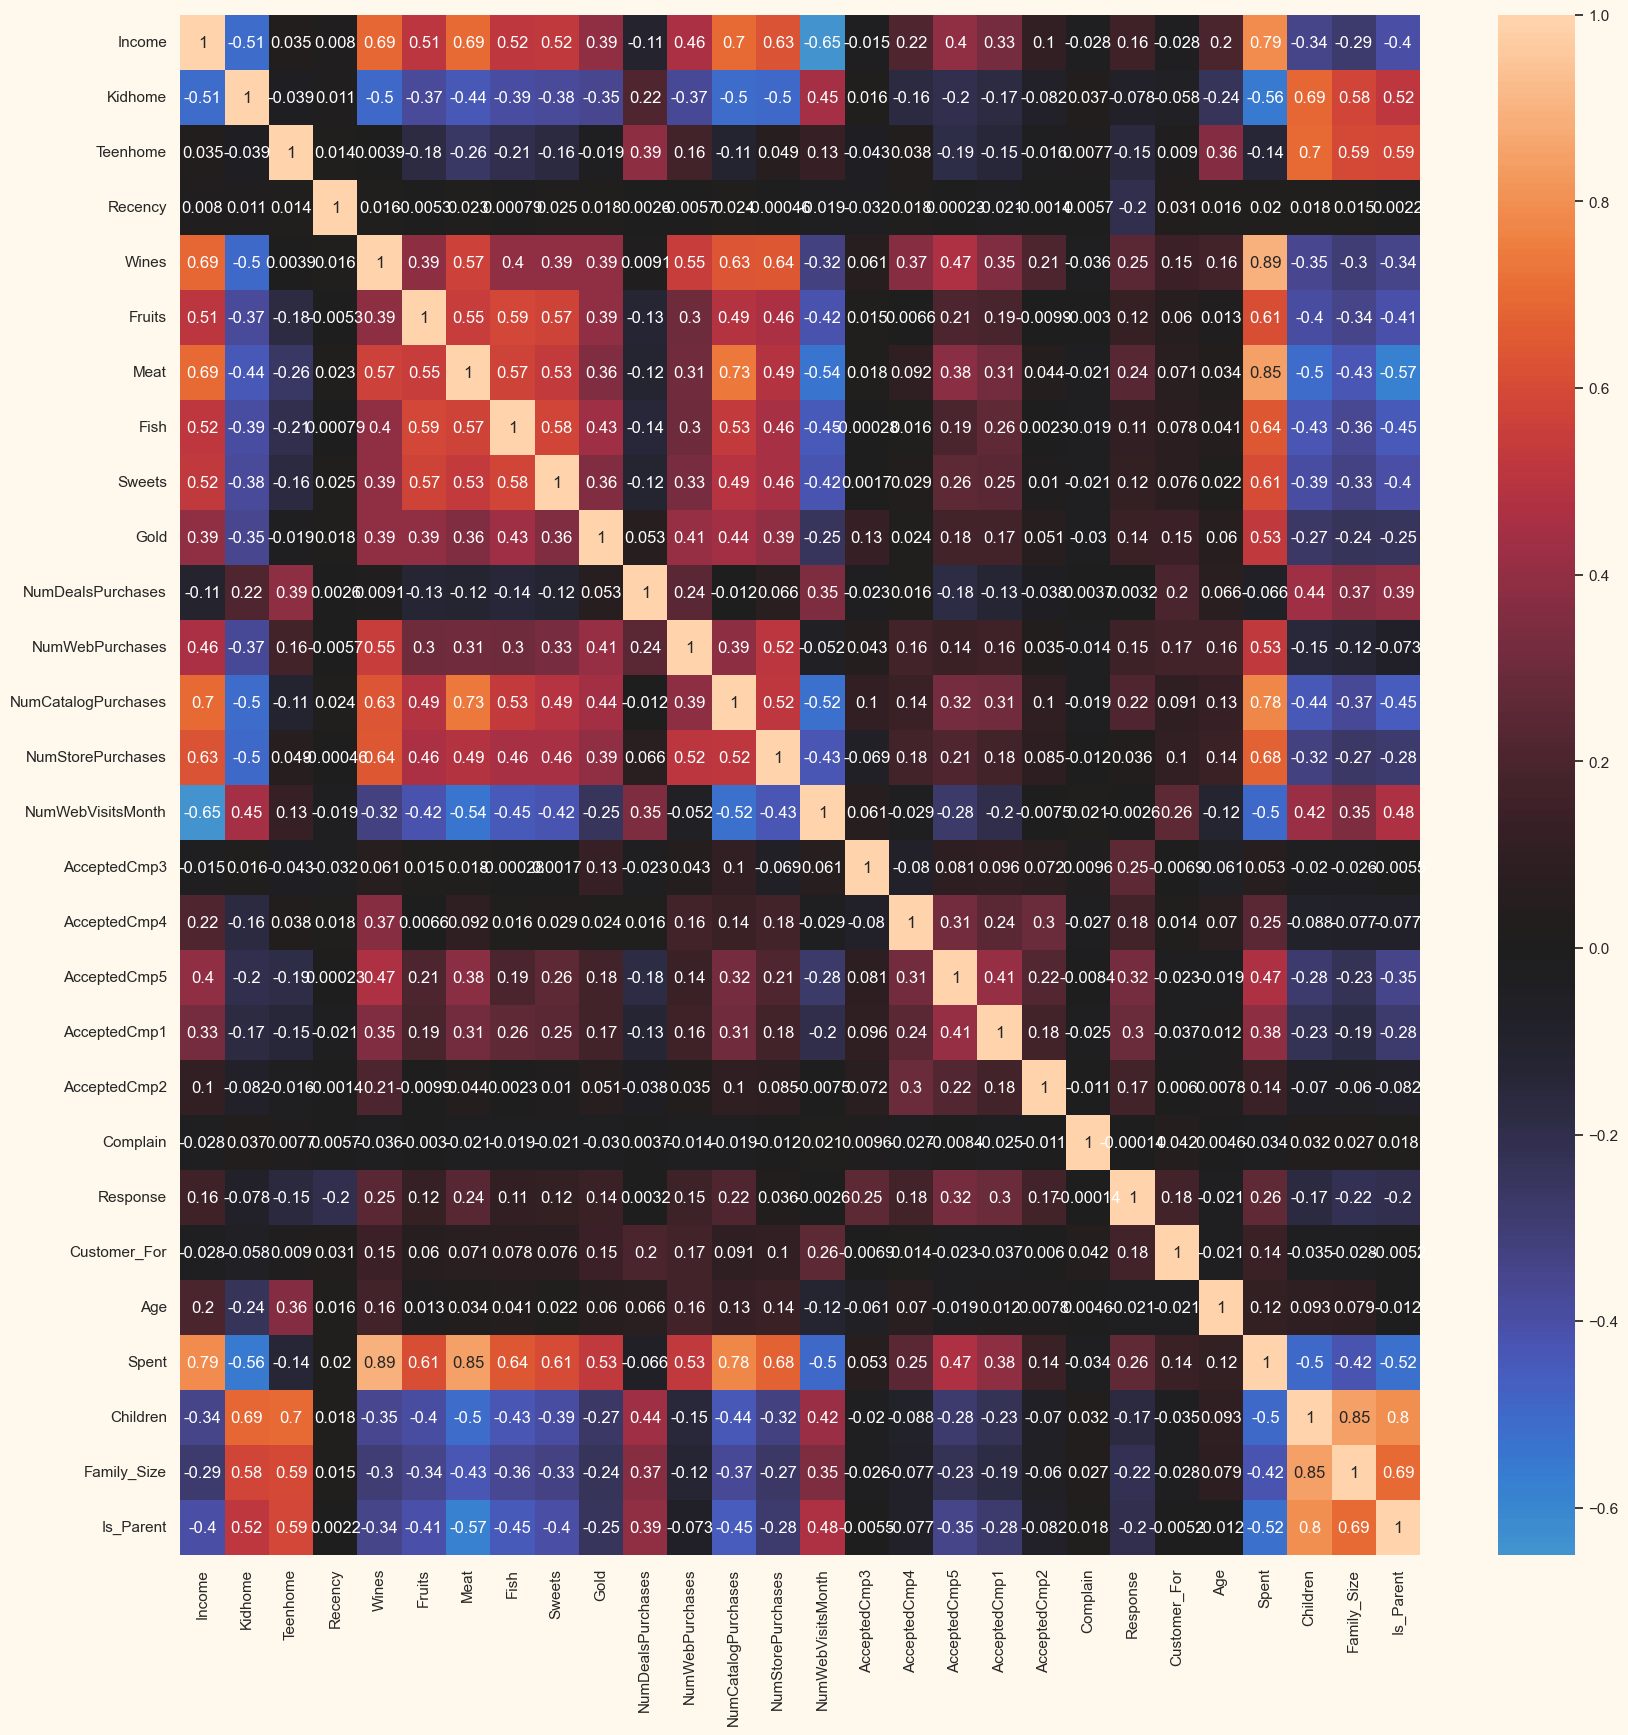

In [11]:
correlation_matrix= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(correlation_matrix,annot=True, center=0)

- Income has a moderate positive correlation with variables like Kidhome (0.51), Meat (0.44), and Sweets (0.38), suggesting that higher income is associated with having children at home and higher consumption of meat and sweet products.
- Recency has relatively low correlations with most variables, indicating that the time since the last purchase or interaction may not be strongly related to other factors in this dataset.
- Wines, Fruits, Meat, Fish, and Sweets (which likely represent various product categories) exhibit moderate positive correlations among themselves, suggesting that customers who purchase one category tend to purchase others as well.
- NumWebVisitsMonth (number of website visits per month) has moderate positive correlations with AcceptedCmp3 (0.45) and AcceptedCmp5 (0.42), indicating that higher website visits are associated with accepting certain promotional campaigns.
- AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, and AcceptedCmp5 (campaign acceptance variables) exhibit moderate positive correlations among themselves, suggesting that customers who accept one campaign are more likely to accept others.
- Customer_For (likely customer tenure or loyalty) has a moderate positive correlation with Age (0.61), implying that older customers tend to have longer tenure with the company.
- Children and Family_Size exhibit a strong positive correlation (0.85), as expected, since larger families tend to have more children.
- Is_Parent (parental status) has moderate positive correlations with variables like Kidhome (0.56), Teenhome (0.35), and Children (0.69), indicating the expected relationships between parental status, presence of children, and family size.

In [12]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

scaled_ds.head()

All features are now scaled


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


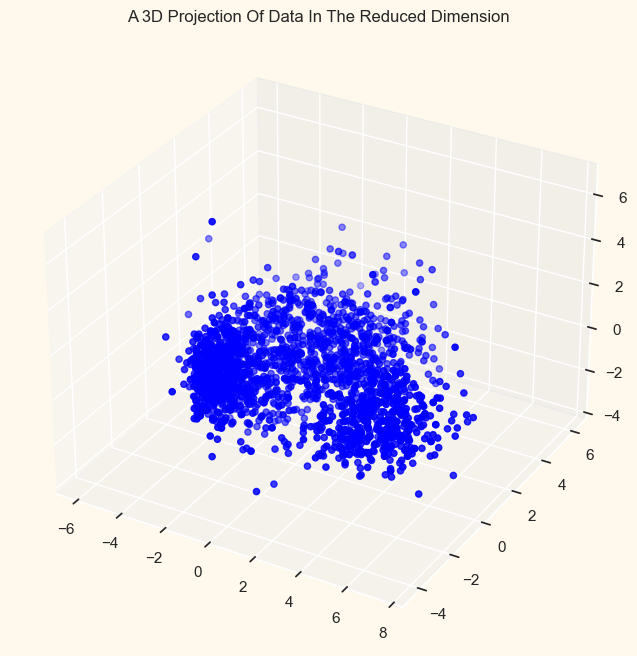

In [13]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))

x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [14]:
# making trials and errors starting with 4 clusters

AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

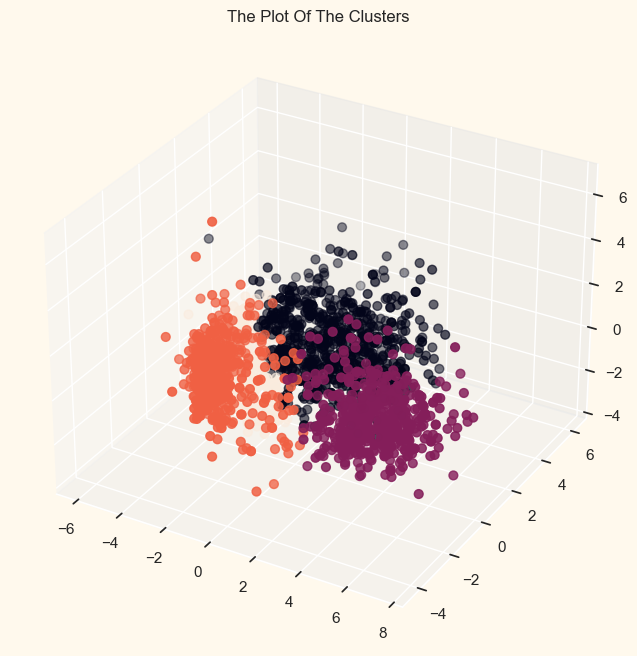

In [15]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

The 3D scatter plot illustrates clustered data points, with each color representing a distinct group. These clusters can symbolize various applications such as customer segmentation, market research, medical data grouping, or document clustering. The axes denote different features, with proximity within clusters indicating similarity. The plot helps visualize how data points naturally group based on their attributes. Further context is needed to specify the exact nature of the clusters.







In [16]:
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

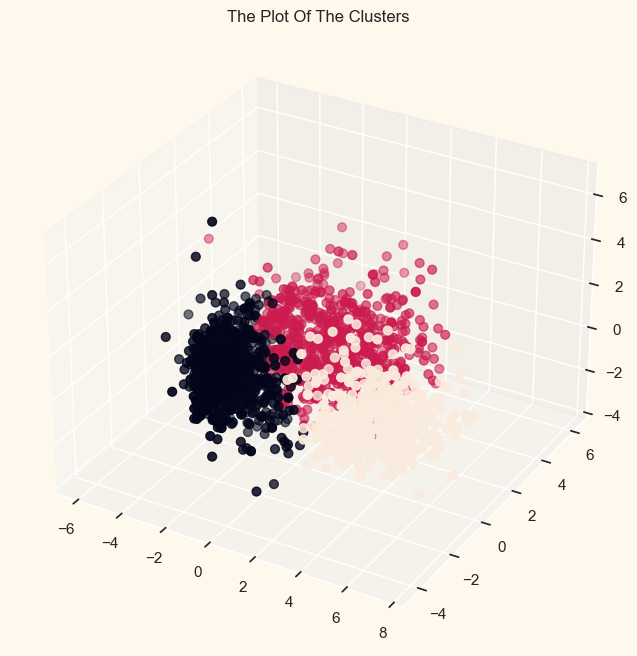

In [17]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

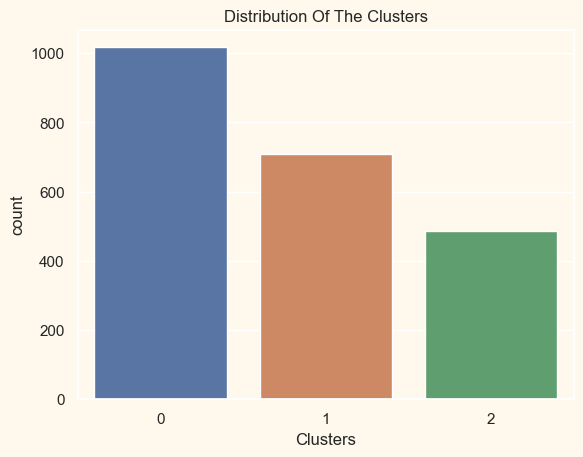

In [18]:
pl = sns.countplot(x=data["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

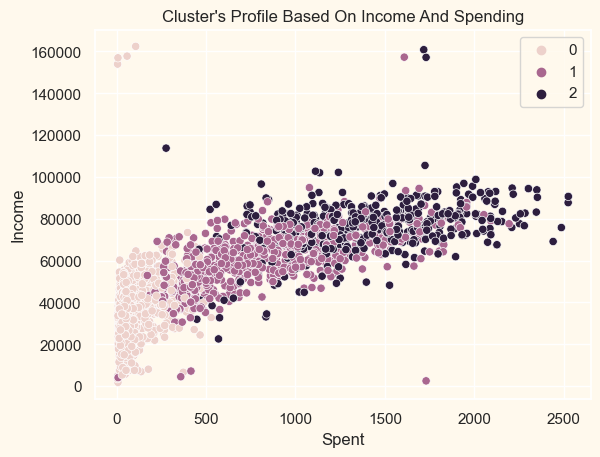

In [19]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

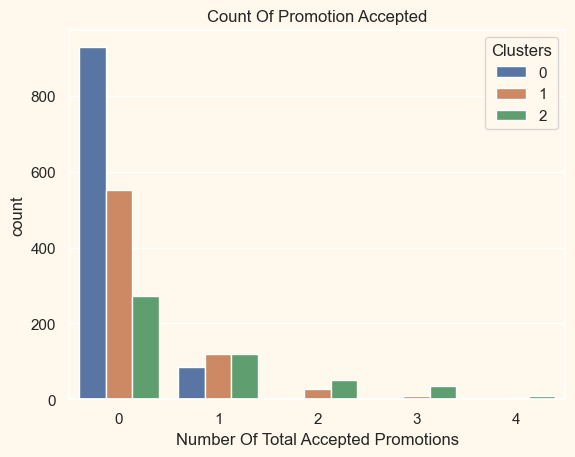

In [20]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 4 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.



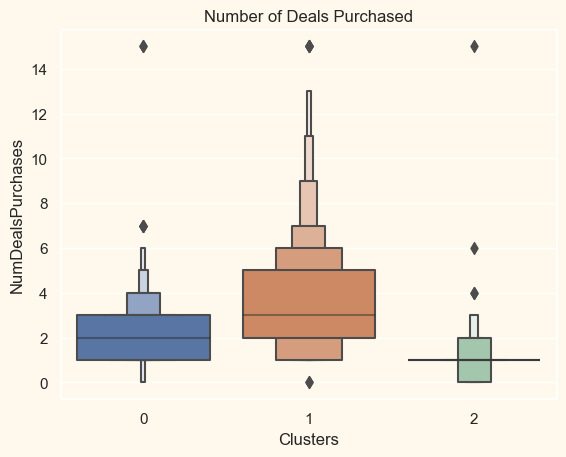

In [21]:
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike campaigns, the deals offered did well. It has best outcome with cluster 1 and somewhat in cluster 0. However, our star customers cluster 2 are not much into the deals. Nothing seems to attract cluster 0 overwhelmingly

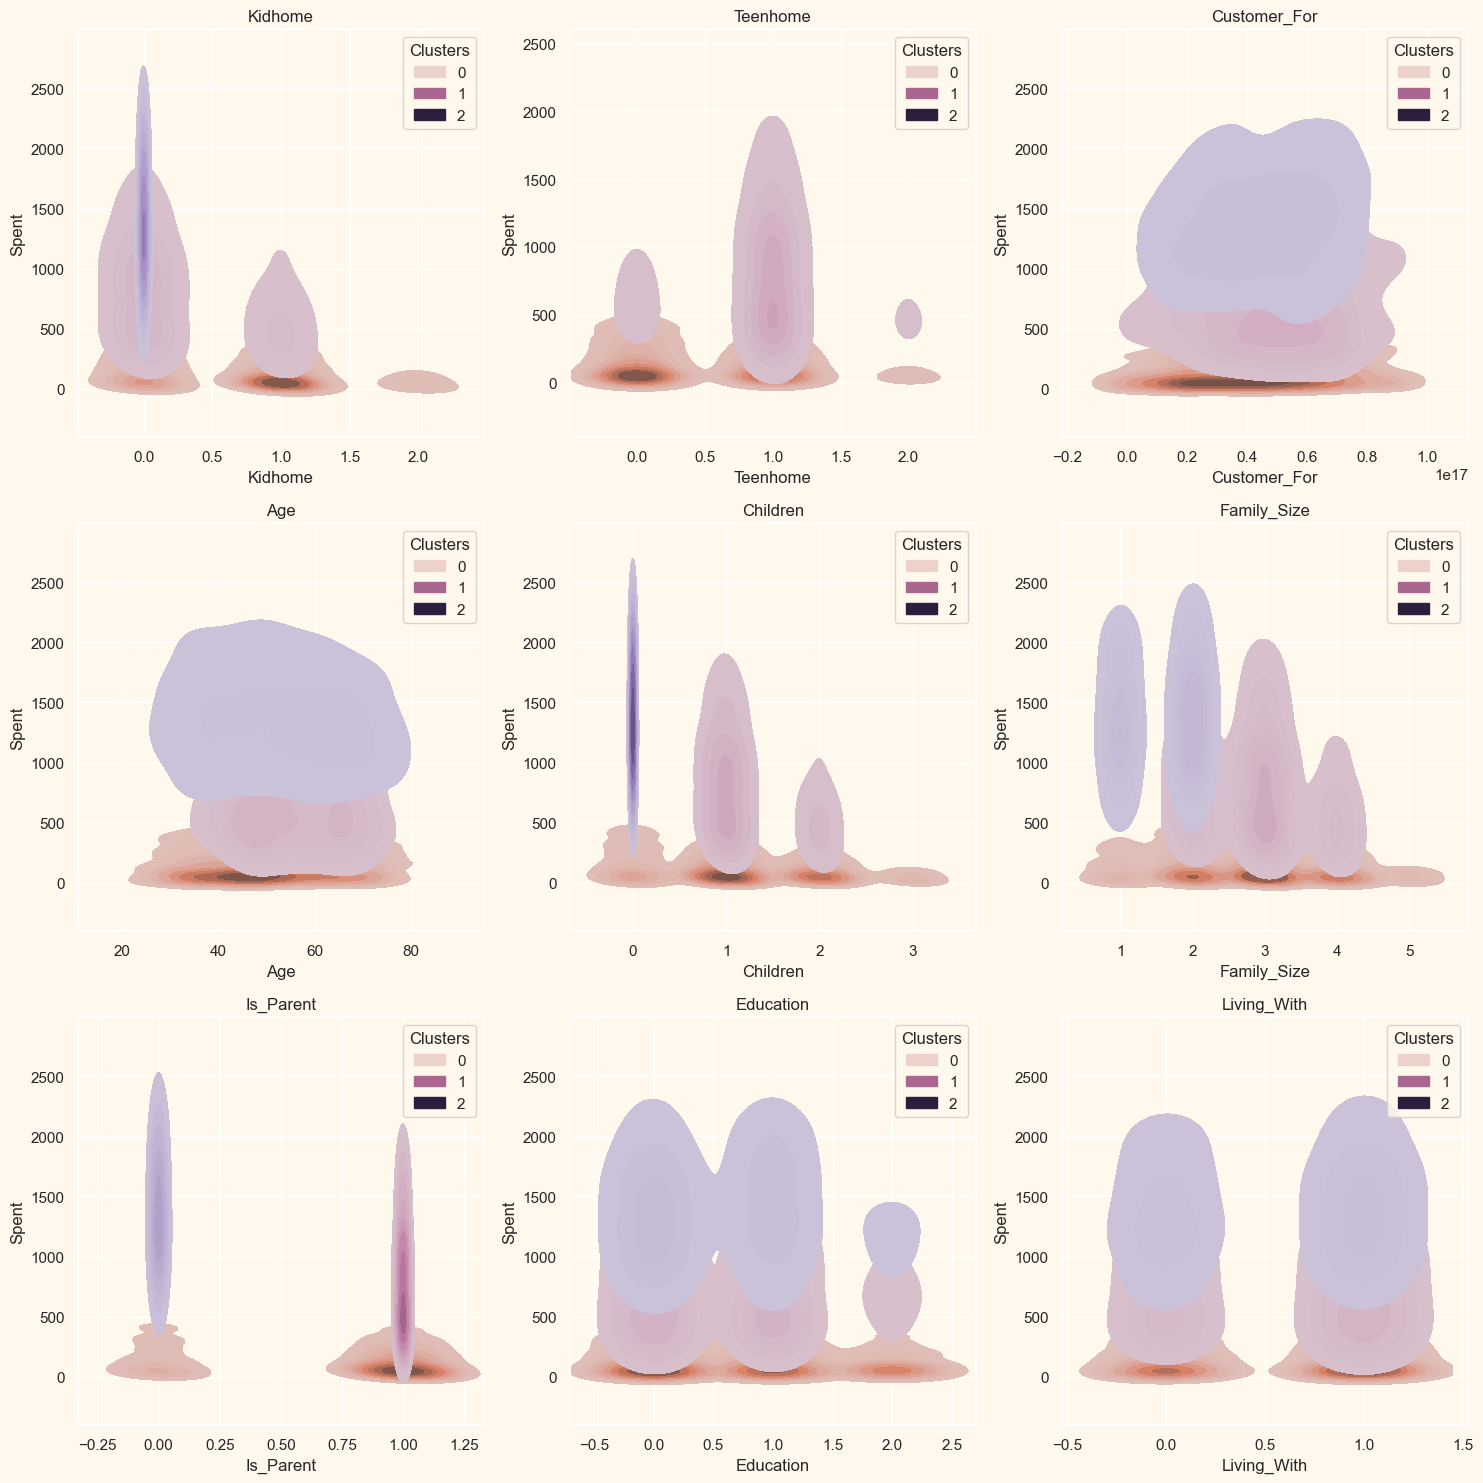

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

axes = axes.flatten()
for idx, feature in enumerate(["Kidhome", "Teenhome", "Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education", "Living_With"]
):
    sns.kdeplot(
        x=data[feature],
        y=data["Spent"],
        hue=data["Clusters"],
        fill=True,
        ax=axes[idx]
    )
    axes[idx].set_title(feature)
plt.tight_layout()
plt.show()

- Cluster 1 (purple) likely represents a segment of families with children, as evidenced by the bimodal distribution for age and a peak around 1-2 children.
- Cluster 2 (pink) may represent an older demographic segment, potentially retirees or empty nesters, with a higher age distribution and fewer children or family members living together.
- Cluster 3 (dark purple) appears to represent a segment with a younger age distribution, potentially singles or couples without children, living with fewer family members or alone.

The distributions for variables like "Customer_For" (likely a measure of customer loyalty or tenure), "Is_Parent" (binary indicator for parenthood), and "Living_With" (number of household members) also exhibit distinct patterns across the clusters, further differentiating the segments.
These customer or market segments could be valuable for targeted marketing, product development, or tailored service offerings based on the unique characteristics and needs of each group.